In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data15 = pd.read_csv("2015.csv")
data16 = pd.read_csv("2016.csv")
data17 = pd.read_csv("2017.csv")
data18 = pd.read_csv("2018.csv")
data19 = pd.read_csv("2019.csv")

In [3]:
data15.shape, data16.shape,data17.shape, data18.shape, data19.shape

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

In [4]:
data15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
data17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
data18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [8]:
data19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
dfs = [data15, data16, data17, data18, data19]
for i in dfs:
    print(i.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [10]:
data19.rename(columns= {'Overall rank' : 'Happiness Rank', 
                        'Country or region' : 'Country',
                        'Score': 'Happiness Score', 
                        'Freedom to make life choices': 'Freedom', 
                        }, inplace= True)

data18.rename(columns= {'Overall rank' : 'Happiness Rank', 
                        'Country or region' : 'Country',
                        'Score': 'Happiness Score', 
                        'Freedom to make life choices': 'Freedom', 
                        }, inplace= True)

data17.rename(columns= {'Happiness.Rank':'Happiness Rank', 
                        'Happiness.Score':'Happiness Score',                      
                        'Economy..GDP.per.Capita.':'GDP per capita', 
                        'Family':'Social support',
                       'Health..Life.Expectancy.':'Healthy life expectancy', 
                       'Trust..Government.Corruption.':'Perceptions of corruption',
                        'Dystopia.Residual':'Dystopia Residual'
                        }, inplace= True)

data16.rename(columns= {'Economy (GDP per Capita)':'GDP per capita', 
                        'Family':'Social support', 
                        'Health (Life Expectancy)':'Healthy life expectancy',
                        'Trust (Government Corruption)':'Perceptions of corruption'
                        }, inplace= True)

data15.rename(columns= {'Economy (GDP per Capita)':'GDP per capita', 
                        'Family':'Social support', 
                        'Health (Life Expectancy)':'Healthy life expectancy',
                        'Trust (Government Corruption)':'Perceptions of corruption'
                        }, inplace= True)

In [11]:
data15 = data15.drop(columns=['Standard Error'])
data16 = data16.drop(columns=['Lower Confidence Interval','Upper Confidence Interval'])
data17 = data17.drop(columns=['Whisker.high','Whisker.low'])


In [12]:
data18

,Happiness Rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [13]:
data15.insert(0, "Year", 2015)
data16.insert(0, "Year", 2016)
data17.insert(0, "Year", 2017)
data18.insert(0, "Year", 2018)
data19.insert(0, "Year", 2019)

In [14]:
C_R = pd.concat([data15[["Country", "Region"]], data16[["Country", "Region"]]])

In [15]:
# rimuoviamo i duplicati, restano 164 righe
C_R.drop_duplicates(inplace=True)
C_R.shape

(164, 2)

In [16]:
Uncorrelated = []

for n in data17["Country"]:
    if n not in list(C_R["Country"]):
        Uncorrelated.append(n)

for n in data18["Country"]:
    if n not in list(C_R["Country"]):
        Uncorrelated.append(n)

for n in data19["Country"]:
    if n not in list(C_R["Country"]):
        Uncorrelated.append(n)

sorted(Uncorrelated)

['Gambia',
 'Hong Kong S.A.R., China',
 'North Macedonia',
 'Northern Cyprus',
 'Northern Cyprus',
 'Taiwan Province of China',
 'Trinidad & Tobago',
 'Trinidad & Tobago']

In [17]:
data17.loc[(data17.Country == 'Taiwan Province of China'),'Country']='Taiwan'
data17.loc[(data17.Country == 'Hong Kong S.A.R., China'),'Country']='Hong Kong'

data18.loc[(data18.Country == 'Trinidad & Tobago'),'Country']='Trinidad and Tobago'
data18.loc[(data18.Country == 'Northern Cyprus'),'Country']='North Cyprus'

data19.loc[(data19.Country == 'Trinidad & Tobago'),'Country']='Trinidad and Tobago'
data19.loc[(data19.Country == 'Northern Cyprus'),'Country']='North Cyprus'
data19.loc[(data19.Country == 'North Macedonia'),'Country']='Macedonia'

In [18]:
print(list(C_R["Region"].unique()))

['Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa', 'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia']


In [19]:
C_R.isnull().sum()

Country    0
Region     0
dtype: int64

In [20]:
data17 = pd.merge(data17, C_R, on = "Country", how="left")
data18 = pd.merge(data18, C_R, on = "Country", how="left")
data19 = pd.merge(data19, C_R, on = "Country", how="left")
data17

,Year,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual,Region
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
150,2017,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
151,2017,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
152,2017,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
153,2017,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa


In [21]:
dff = pd.concat([data15, data16, data17, data18, data19])
dff.sample(10)

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
116,2017,Iraq,Middle East and Northern Africa,117,4.497,1.102710,0.978613,0.501180,0.288556,0.107216,0.199637,1.318907
105,2016,Zambia,Sub-Saharan Africa,106,4.795,0.612020,0.637600,0.235730,0.426620,0.114790,0.178660,2.589910
123,2016,Ghana,Sub-Saharan Africa,124,4.276,0.631070,0.493530,0.296810,0.409730,0.032600,0.212030,2.200200
155,2019,South Sudan,Sub-Saharan Africa,156,2.853,0.306000,0.575000,0.295000,0.010000,0.091000,0.202000,NaN
63,2018,Paraguay,Latin America and Caribbean,64,5.681,0.835000,1.522000,0.615000,0.541000,0.074000,0.162000,NaN
14,2017,Ireland,Western Europe,15,6.977,1.535707,1.558231,0.809783,0.573110,0.298388,0.427858,1.773869
114,2019,Burkina Faso,Sub-Saharan Africa,115,4.587,0.331000,1.056000,0.380000,0.255000,0.113000,0.177000,NaN
33,2016,Saudi Arabia,Middle East and Northern Africa,34,6.379,1.489530,0.848290,0.592670,0.379040,0.300080,0.154570,2.614820
19,2019,Czech Republic,Central and Eastern Europe,20,6.852,1.269000,1.487000,0.920000,0.457000,0.036000,0.046000,NaN
57,2017,Bolivia,Latin America and Caribbean,58,5.823,0.833757,1.227619,0.473630,0.558733,0.060478,0.225561,2.443279


In [22]:
dff.isnull().sum()

Year                           0
Country                        0
Region                         1
Happiness Rank                 0
Happiness Score                0
GDP per capita                 0
Social support                 0
Healthy life expectancy        0
Freedom                        0
Perceptions of corruption      1
Generosity                     0
Dystopia Residual            312
dtype: int64

In [23]:
dff.Region.fillna("Sub-Saharan Africa", inplace=True)
dff.isna().sum()

Year                           0
Country                        0
Region                         0
Happiness Rank                 0
Happiness Score                0
GDP per capita                 0
Social support                 0
Healthy life expectancy        0
Freedom                        0
Perceptions of corruption      1
Generosity                     0
Dystopia Residual            312
dtype: int64

In [24]:
dff.drop(['Dystopia Residual'],axis=1, inplace=True)

In [25]:
dff.isna().sum()

Year                         0
Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Perceptions of corruption    1
Generosity                   0
dtype: int64

In [26]:
dff['Perceptions of corruption'].isnull().any()

True

In [27]:
dff[dff['Perceptions of corruption'].isnull()]

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
19,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [28]:
dff.loc[dff["Country"] == "United Arab Emirates"]['Perceptions of corruption'].mean()

0.3119823909258842

In [29]:
dff.fillna(0.311982, inplace=True)

In [30]:
dff.loc[dff["Country"] == "United Arab Emirates"]

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
19,2015,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.385830,0.264280
27,2016,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.355610,0.265910
20,2017,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.324490,0.360942
19,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,0.311982,0.186000
20,2019,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.182000,0.262000


In [31]:
dff.isnull().sum()

Year                         0
Country                      0
Region                       0
Happiness Rank               0
Happiness Score              0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
dtype: int64

In [32]:


                                #      FINE     EDA 
    
    

In [33]:
dff.corr()

,Year,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
Year,1.000000,-0.007768,0.007065,0.019768,0.367431,0.130302,0.010353,-0.120382,-0.192587
Happiness Rank,-0.007768,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.374567,-0.117713
Happiness Score,0.007065,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.400026,0.137578
GDP per capita,0.019768,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.310581,-0.014560
Social support,0.367431,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.124014,-0.037262
Healthy life expectancy,0.130302,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250529,0.010638
Freedom,0.010353,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.456604,0.290706
Perceptions of corruption,-0.120382,-0.374567,0.400026,0.310581,0.124014,0.250529,0.456604,1.000000,0.317672
Generosity,-0.192587,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.317672,1.000000


<AxesSubplot:>

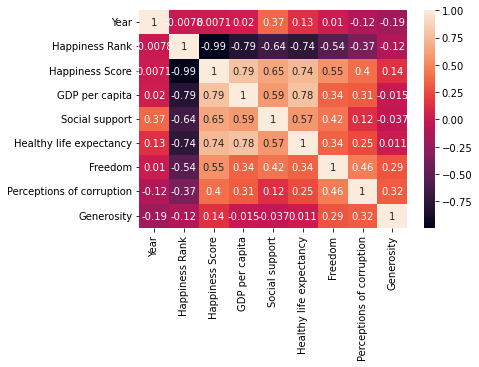

In [34]:
sns.heatmap(dff.corr(), annot=True)

In [35]:
new_region = {'Western Europe':'Europe', 'North America':'North America', 'Australia and New Zealand':'Oceania',
          'Middle East and Northern Africa':'Middle East and Northern Africa', 'Latin America and Caribbean':'Center and South America',
          'Southeastern Asia':'Asia', 'Central and Eastern Europe':'Europe', 'Eastern Asia':'Asia', 
          'Sub-Saharan Africa':'Sub-Saharan Africa', 'Southern Asia':'Asia'}

dff['new_region'] = dff['Region'].map(new_region)

In [36]:
dff.groupby('Country')['new_region'].value_counts()

Country      new_region                     
Afghanistan  Asia                               5
Albania      Europe                             5
Algeria      Middle East and Northern Africa    5
Angola       Sub-Saharan Africa                 4
Argentina    Center and South America           5
                                               ..
Venezuela    Center and South America           5
Vietnam      Asia                               5
Yemen        Middle East and Northern Africa    5
Zambia       Sub-Saharan Africa                 5
Zimbabwe     Sub-Saharan Africa                 5
Name: new_region, Length: 165, dtype: int64

In [37]:
dff.new_region.value_counts()

Europe                             250
Sub-Saharan Africa                 196
Center and South America           111
Asia                               109
Middle East and Northern Africa     96
North America                       10
Oceania                             10
Name: new_region, dtype: int64

In [38]:
dff[['new_region', 'Happiness Score']]

,new_region,Happiness Score
0,Europe,7.587
1,Europe,7.561
2,Europe,7.527
3,Europe,7.522
4,North America,7.427
...,...,...
151,Sub-Saharan Africa,3.334
152,Sub-Saharan Africa,3.231
153,Asia,3.203
154,Sub-Saharan Africa,3.083


In [39]:
dff.groupby('new_region')['Happiness Score'].mean().sort_values(ascending=False)

new_region
Oceania                            7.294600
North America                      7.174700
Center and South America           6.023811
Europe                             5.979176
Middle East and Northern Africa    5.337208
Asia                               5.180000
Sub-Saharan Africa                 4.190153
Name: Happiness Score, dtype: float64

In [40]:
dff.groupby('new_region')['Country'].count().sort_values(ascending=False)

new_region
Europe                             250
Sub-Saharan Africa                 196
Center and South America           111
Asia                               109
Middle East and Northern Africa     96
North America                       10
Oceania                             10
Name: Country, dtype: int64

In [41]:
sns.set_style('darkgrid')
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize']= (15,7)
plt.rcParams['figure.facecolor']= 'lightgray'

<AxesSubplot:xlabel='Happiness Score', ylabel='GDP per capita'>

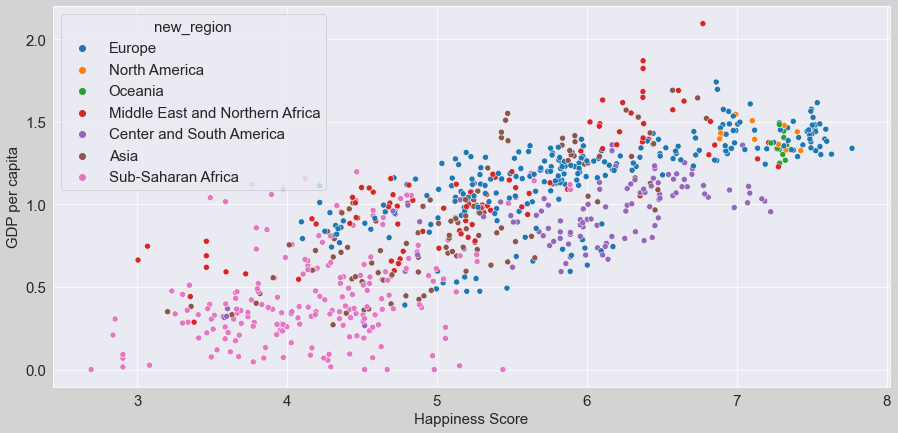

In [42]:
sns.scatterplot(x= 'Happiness Score', y= 'GDP per capita', data = dff, hue = 'new_region')


In [43]:
dff[['GDP per capita', 'Country','Year']].sort_values(by='GDP per capita')

,GDP per capita,Country,Year
97,0.000000,Somalia,2018
75,0.000000,Somalia,2016
154,0.000000,Central African Republic,2017
111,0.000000,Somalia,2019
119,0.000000,Congo (Kinshasa),2015
...,...,...,...
19,1.697520,Luxembourg,2016
17,1.741944,Luxembourg,2017
35,1.824270,Qatar,2016
34,1.870766,Qatar,2017


<AxesSubplot:xlabel='Happiness Score', ylabel='Social support'>

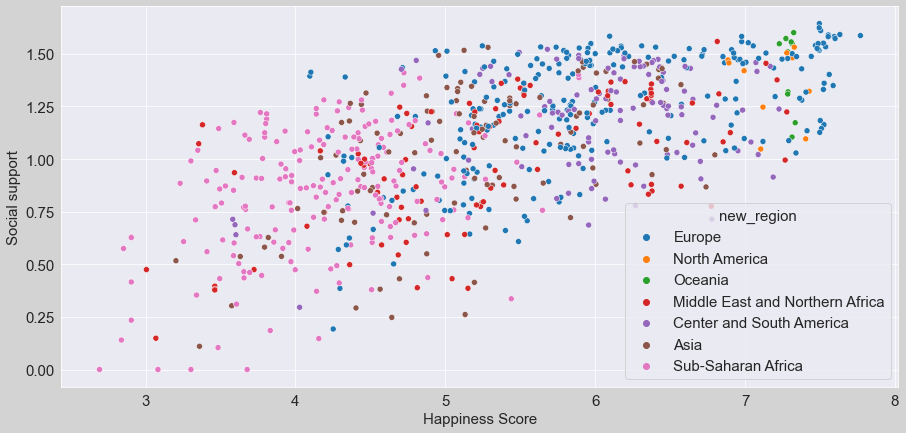

In [44]:
sns.scatterplot(x= 'Happiness Score', y= 'Social support', data = dff, hue = 'new_region')


In [45]:
dff[['Social support', 'Country','Year']].sort_values(by='Social support', ascending= False).head(50)

,Social support,Country,Year
3,1.644000,Iceland,2018
3,1.624000,Iceland,2019
2,1.610574,Iceland,2017
7,1.601000,New Zealand,2018
0,1.592000,Finland,2018
2,1.590000,Denmark,2018
0,1.587000,Finland,2019
43,1.584000,Uzbekistan,2018
13,1.583000,Ireland,2018
1,1.582000,Norway,2018


In [46]:
gdp_new_region = dff.groupby('new_region')['GDP per capita'].sum().sort_values(ascending=False)
gdp_new_region

new_region
Europe                             291.561068
Middle East and Northern Africa    105.852783
Center and South America           104.524358
Asia                                98.796241
Sub-Saharan Africa                  87.832337
North America                       14.220374
Oceania                             13.561971
Name: GDP per capita, dtype: float64

In [47]:
dff.groupby('new_region')['Happiness Score'].mean().sort_values(ascending=False)

new_region
Oceania                            7.294600
North America                      7.174700
Center and South America           6.023811
Europe                             5.979176
Middle East and Northern Africa    5.337208
Asia                               5.180000
Sub-Saharan Africa                 4.190153
Name: Happiness Score, dtype: float64

Text(0, 0.5, '')

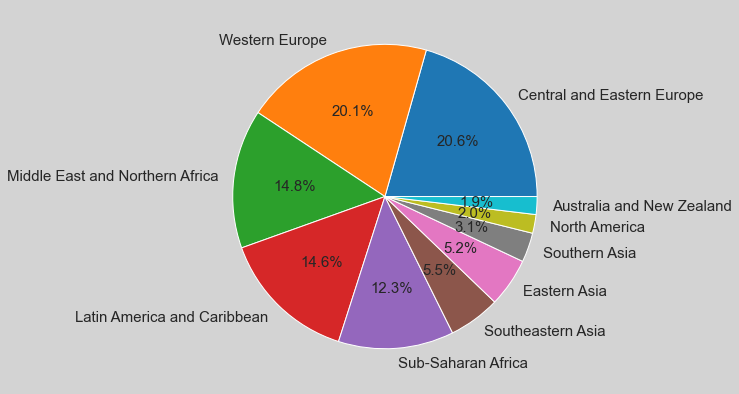

In [48]:
gdp_Region = dff.groupby('Region')['GDP per capita'].sum().sort_values(ascending=False)
gdp_Region.plot.pie(autopct='%1.1f%%')
plt.ylabel('') 

Text(0, 0.5, '')

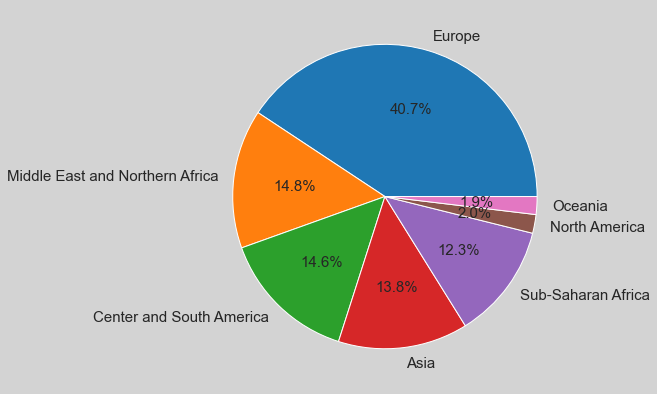

In [49]:
gdp_new_region.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

<AxesSubplot:>

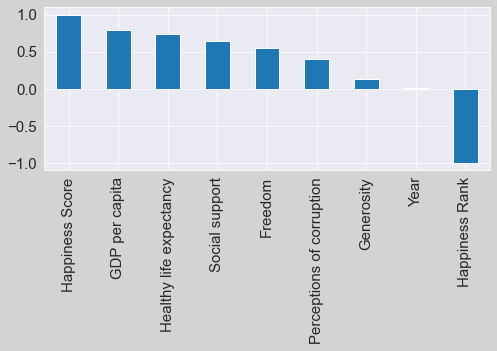

In [50]:
dff.corr()['Happiness Score'].sort_values(ascending=False).plot(kind='bar', figsize=(8,3))


In [51]:
corruz = dff.groupby('new_region')['Perceptions of corruption'].mean()
corruz.sort_values(ascending=False, inplace= True)
corruz

new_region
Oceania                            0.357294
North America                      0.223345
Middle East and Northern Africa    0.146413
Europe                             0.137359
Asia                               0.119655
Sub-Saharan Africa                 0.105985
Center and South America           0.092432
Name: Perceptions of corruption, dtype: float64

Text(0.5, 0, '')

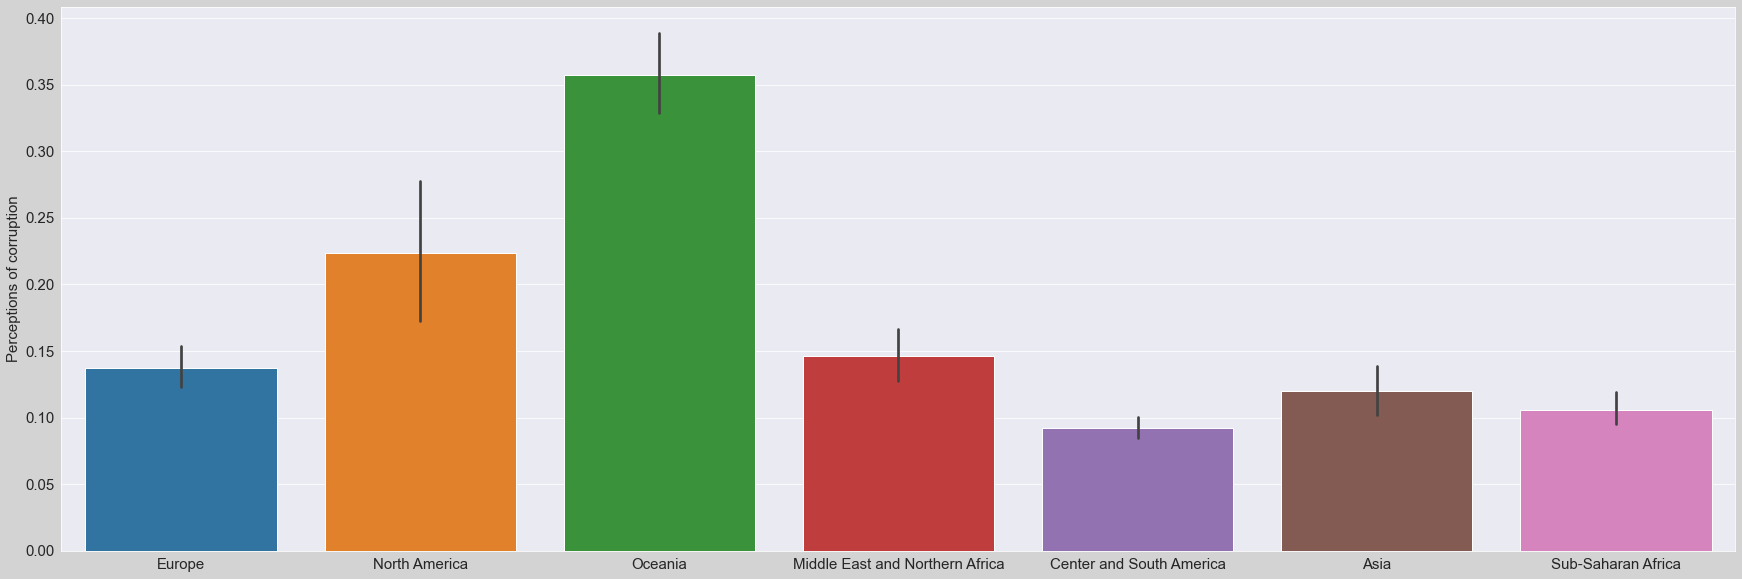

In [52]:
plt.figure(figsize=(30,10))
sns.barplot(x=dff.new_region, y=dff['Perceptions of corruption'])
plt.xlabel('')

In [53]:


                                # ANALISI SULL'ASIA
    
    

In [54]:
MASK = dff.new_region=='Asia'
asian_pl = dff[MASK]
asian_pl

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,new_region
23,2015,Singapore,Southeastern Asia,24,6.798,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,Asia
33,2015,Thailand,Southeastern Asia,34,6.455,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,Asia
37,2015,Taiwan,Eastern Asia,38,6.298,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,Asia
45,2015,Japan,Eastern Asia,46,5.987,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,Asia
46,2015,South Korea,Eastern Asia,47,5.984,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
124,2019,Bangladesh,Southern Asia,125,4.456,0.56200,0.92800,0.72300,0.52700,0.14300,0.16600,Asia
129,2019,Sri Lanka,Southern Asia,130,4.366,0.94900,1.26500,0.83100,0.47000,0.04700,0.24400,Asia
130,2019,Myanmar,Southeastern Asia,131,4.360,0.71000,1.18100,0.55500,0.52500,0.17200,0.56600,Asia
139,2019,India,Southern Asia,140,4.015,0.75500,0.76500,0.58800,0.49800,0.08500,0.20000,Asia


In [55]:
asian_pl.corr()

,Year,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
Year,1.000000,0.022613,-0.003724,0.074678,0.464740,0.130464,0.043995,-0.059612,-0.265828
Happiness Rank,0.022613,1.000000,-0.992662,-0.800752,-0.510664,-0.678052,-0.060883,-0.269222,0.140495
Happiness Score,-0.003724,-0.992662,1.000000,0.797787,0.540149,0.692249,0.110080,0.278994,-0.123669
GDP per capita,0.074678,-0.800752,0.797787,1.000000,0.532544,0.823624,0.092653,0.392743,-0.203899
Social support,0.464740,-0.510664,0.540149,0.532544,1.000000,0.538073,0.420410,0.053734,-0.044891
Healthy life expectancy,0.130464,-0.678052,0.692249,0.823624,0.538073,1.000000,0.207537,0.397860,-0.350100
Freedom,0.043995,-0.060883,0.110080,0.092653,0.420410,0.207537,1.000000,0.251512,0.084259
Perceptions of corruption,-0.059612,-0.269222,0.278994,0.392743,0.053734,0.397860,0.251512,1.000000,0.069225
Generosity,-0.265828,0.140495,-0.123669,-0.203899,-0.044891,-0.350100,0.084259,0.069225,1.000000


<AxesSubplot:>

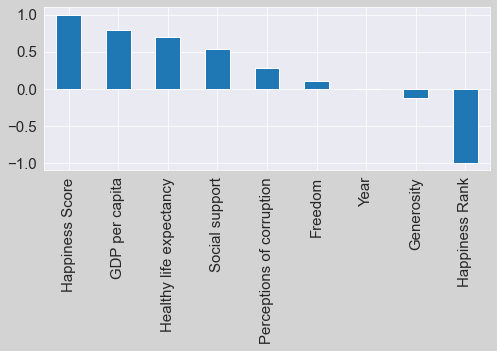

In [56]:
asian_pl.corr()['Happiness Score'].sort_values(ascending=False).plot(kind='bar', figsize=(8,3))


In [57]:
asian_pl.columns

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity', 'new_region'],
      dtype='object')

<AxesSubplot:>

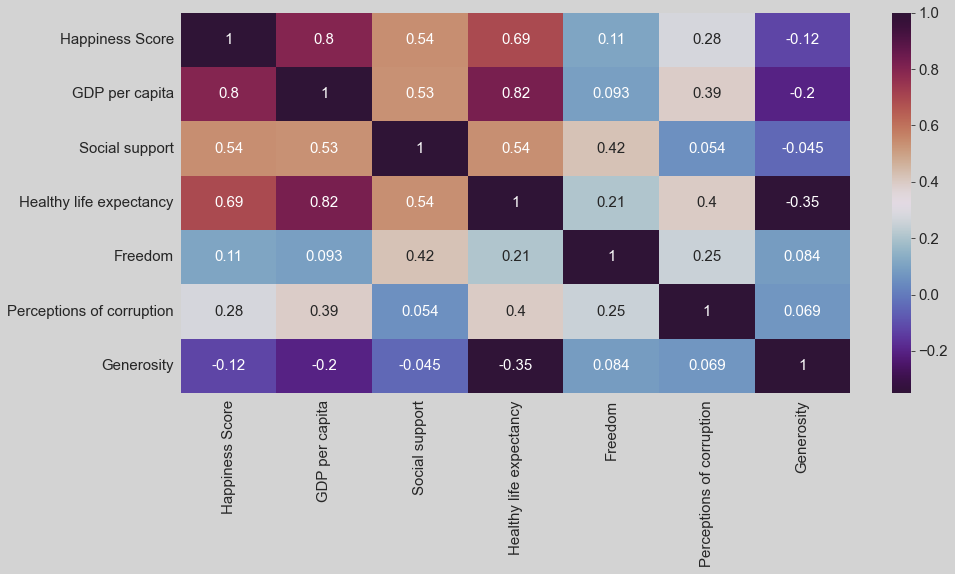

In [58]:
sns.heatmap(asian_pl[['Happiness Score','GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity']].corr(), 
            cmap= 'twilight_shifted', annot=True)

In [59]:
asian_pl.Year.dtype

dtype('int64')

<AxesSubplot:xlabel='GDP per capita', ylabel='Healthy life expectancy'>

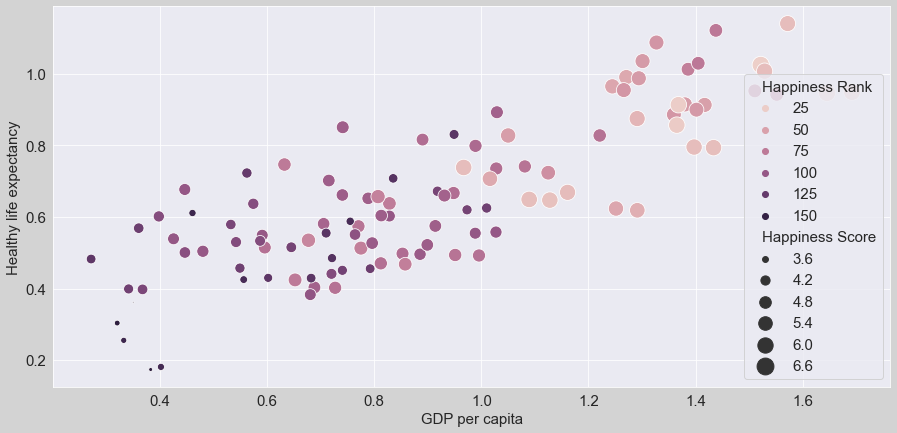

In [60]:
sns.scatterplot(x= 'GDP per capita', y= 'Healthy life expectancy', data = asian_pl, size = 'Happiness Score', 
                sizes=(2, 300), 
                hue= 'Happiness Rank')

In [61]:
asian_pl['Year'] = pd.to_datetime(asian_pl['Year'], format='%Y')
asian_pll =asian_pl.sort_values(['Year'])
asian_pll['Year'] = asian_pll['Year'].astype('str')

<AxesSubplot:>

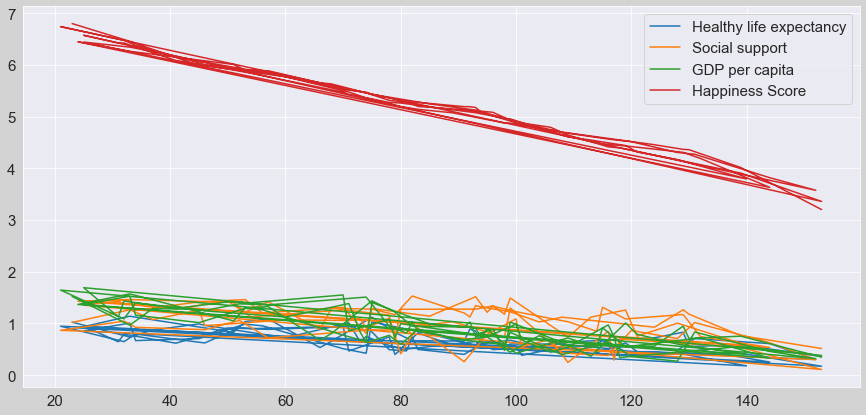

In [62]:
data_plot = asian_pl.loc[:,["Healthy life expectancy","Social support", "GDP per capita","Happiness Score" ]]
data_plot.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

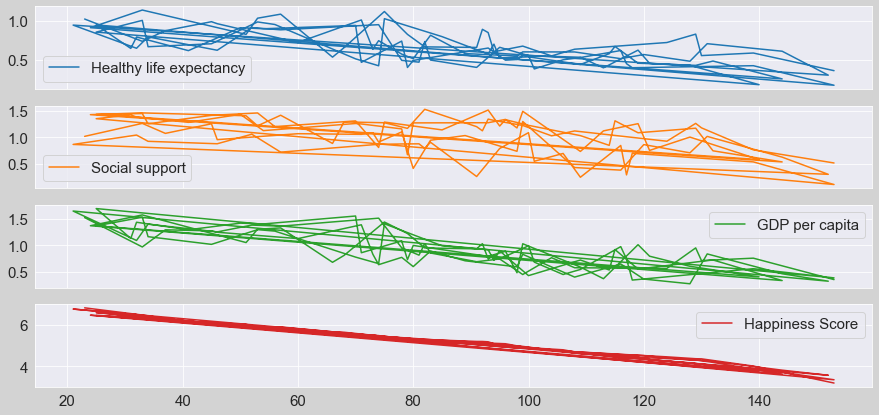

In [63]:
data_plot.plot(subplots = True)

In [ ]:
#creare qui la richiesta mappa del mondo a colori